In [47]:
# Chargement des packages
# !pip install wordcloud
# !pip install tweepy
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd 
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [7]:
df=pd.read_csv("bbc_data.csv", encoding='ISO-8859-1')
df

,data,labels
0,Musicians to tackle US red tape Musicians gro...,entertainment
1,"U2s desire to be number one U2, who have won ...",entertainment
2,Rocker Doherty in on-stage fight Rock singer ...,entertainment
3,Snicket tops US box office chart The film ada...,entertainment
4,"Oceans Twelve raids box office Oceans Twelve,...",entertainment
...,...,...
2220,Warning over Windows Word files Writing a Mic...,tech
2221,Fast lifts rise into record books Two high-sp...,tech
2222,Nintendo adds media playing to DS Nintendo is...,tech
2223,Fast moving phone viruses appear Security fir...,tech


# Description des données

In [9]:
# Informations sur la base de données
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   data    2225 non-null   object
 1   labels  2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


In [11]:
df.isnull().sum()

data      0
labels    0
dtype: int64

In [13]:
df.labels.unique()

array(['entertainment', 'business', 'sport', 'politics', 'tech'],
      dtype=object)

In [15]:
print(df['labels'].value_counts())

labels
sport            511
business         510
politics         417
tech             401
entertainment    386
Name: count, dtype: int64


C:\Users\Nesho\AppData\Local\Temp\ipykernel_99080\617961410.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='labels', order=df['labels'].value_counts().index, palette="viridis")


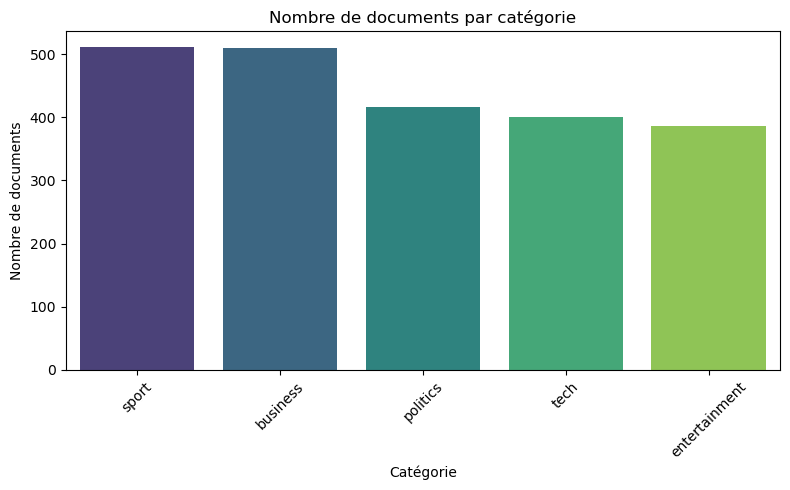

In [20]:
import seaborn as sns

plt.figure(figsize=(8,5))
sns.countplot(data=df, x='labels', order=df['labels'].value_counts().index, palette="viridis")
plt.title('Nombre de documents par catégorie')
plt.xlabel('Catégorie')
plt.ylabel('Nombre de documents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [22]:
# création de mini dataset par label

df_sport = df[df['labels'] == 'sport']
df_business = df[df['labels'] == 'business']
df_politics = df[df['labels'] == 'politics']
df_tech = df[df['labels'] == 'tech']
df_entertainment = df[df['labels'] == 'entertainment']

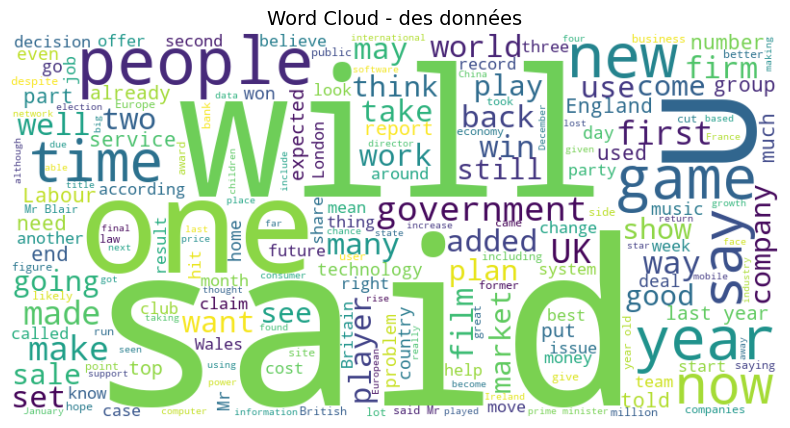

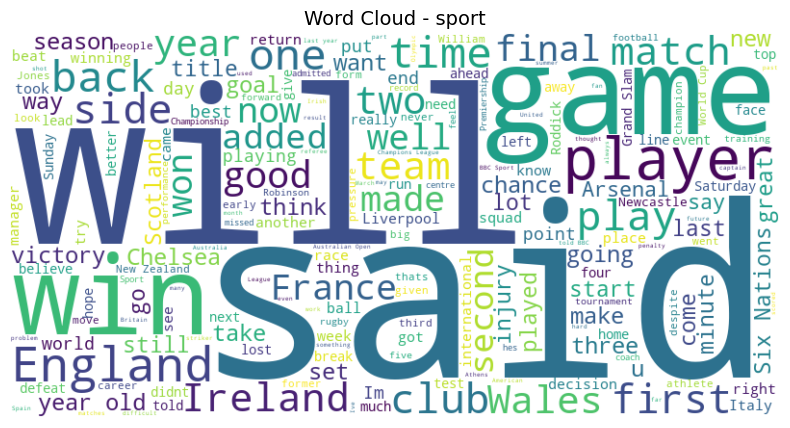

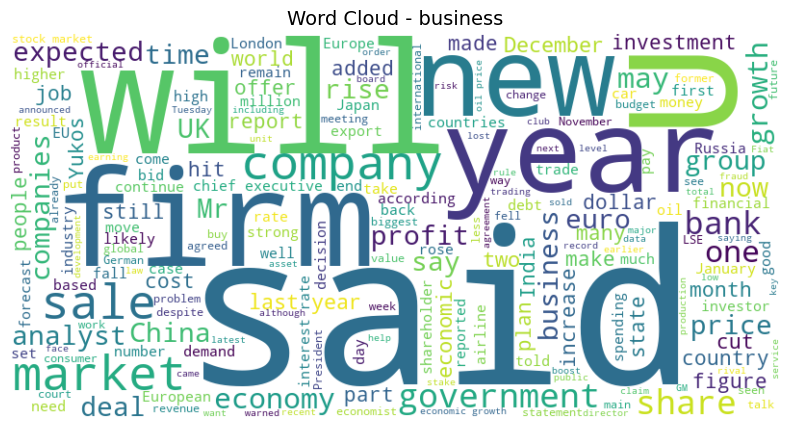

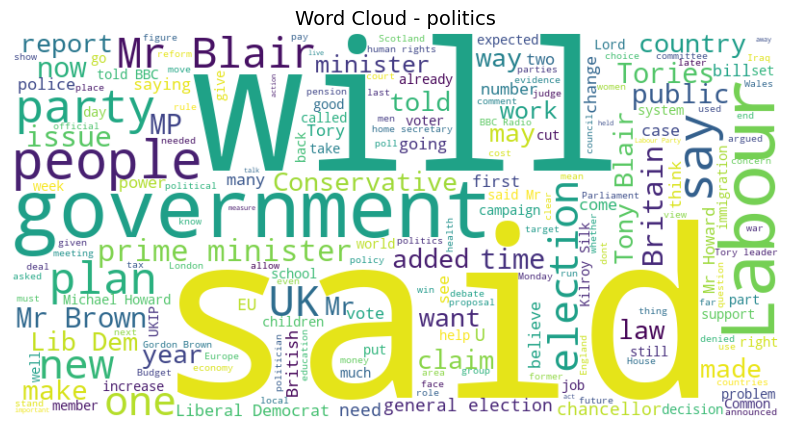

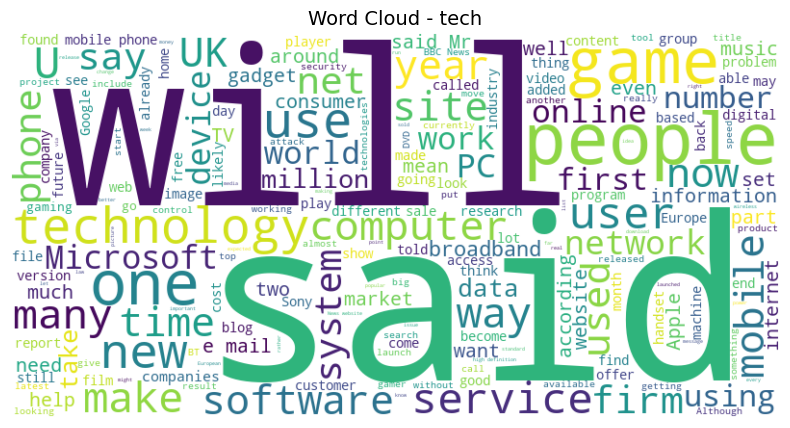

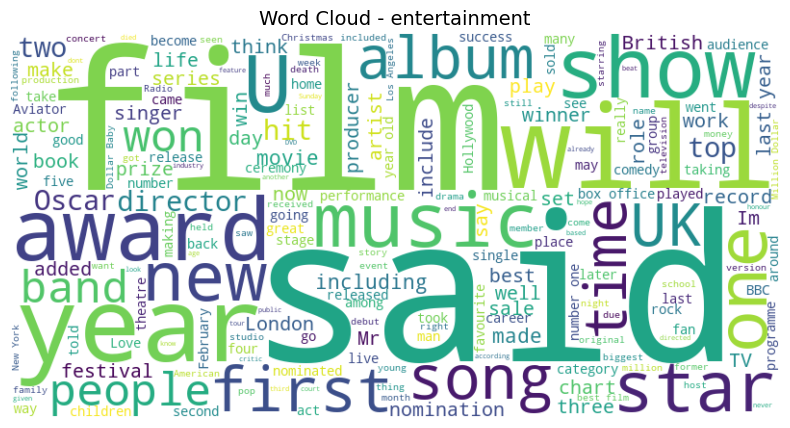

In [24]:
# Fonction pour générer le word cloud
def generer_wordcloud(tweets, titre):
    tout_texte = ' '.join(tweets)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(tout_texte)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(titre, fontsize=14)
    plt.axis('off')
    plt.show()

# Générer le word cloud pour chaque type de sentiment
generer_wordcloud(df['data'], 'Word Cloud - des données')
generer_wordcloud(df_sport['data'], 'Word Cloud - sport')
generer_wordcloud(df_business['data'], 'Word Cloud - business')
generer_wordcloud(df_politics['data'], 'Word Cloud - politics')
generer_wordcloud(df_tech['data'], 'Word Cloud - tech')
generer_wordcloud(df_entertainment['data'], 'Word Cloud - entertainment')

# Nettoyage des données

In [26]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')

nltk.download('stopwords')
nltk.download('punkt_tab')


def clean_text(text):
    # Suppression des caractères spéciaux et de la ponctuation
    text = re.sub(r"[^\w\s]", "", text)
    
    # Conversion en minuscules
    text = text.lower()
    
    # Tokenisation du texte
    tokens = word_tokenize(text)
    
    # Suppression des mots vides
    stop_words = set(stopwords.words("english"))
    tokens = [word for word in tokens if word not in stop_words]
    
    # Joindre les tokens en une seule chaîne
    cleaned_text = ' '.join(tokens)
    
    return cleaned_text


# Appliquer le nettoyage du texte sur la colonne 'texte'
df['data_nettoye'] = df['data'].apply(clean_text)

df


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Nesho\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Nesho\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Nesho\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


,data,labels,data_nettoye
0,Musicians to tackle US red tape Musicians gro...,entertainment,musicians tackle us red tape musicians groups ...
1,"U2s desire to be number one U2, who have won ...",entertainment,u2s desire number one u2 three prestigious gra...
2,Rocker Doherty in on-stage fight Rock singer ...,entertainment,rocker doherty onstage fight rock singer pete ...
3,Snicket tops US box office chart The film ada...,entertainment,snicket tops us box office chart film adaptati...
4,"Oceans Twelve raids box office Oceans Twelve,...",entertainment,oceans twelve raids box office oceans twelve c...
...,...,...,...
2220,Warning over Windows Word files Writing a Mic...,tech,warning windows word files writing microsoft w...
2221,Fast lifts rise into record books Two high-sp...,tech,fast lifts rise record books two highspeed lif...
2222,Nintendo adds media playing to DS Nintendo is...,tech,nintendo adds media playing ds nintendo releas...
2223,Fast moving phone viruses appear Security fir...,tech,fast moving phone viruses appear security firm...


# TF-IDF

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Créer une instance du vectoriseur TfidfVectorizer
vectorizer = TfidfVectorizer()

# Appliquer le vectoriseur sur la colonne 'texte_nettoye'
features = vectorizer.fit_transform(df['data_nettoye'])

# Convertir les caractéristiques en une représentation de matrice creuse
features = features.toarray()

# Afficher les dimensions de la matrice de caractéristiques
print("Dimensions de la matrice de caractéristiques :", features.shape)

Dimensions de la matrice de caractéristiques : (2225, 34412)


In [30]:
features

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [34]:
# c'est une matrice de 2225 lignes et 34412 colonnes
# Chaque cellule [i, j] = score TF-IDF du mot j dans le document i

# Modélisation

In [59]:
from sklearn.model_selection import train_test_split

# Diviser les données en ensembles d'entraînement et de test de façon stratifiée
X_train, X_test, y_train, y_test = train_test_split(features, df['labels'], test_size=0.2, stratify=df['labels'], random_state=0)

# Le paramètre stratify garantit que la répartition des classes dans les ensembles d'entraînement (y_train) et de test (y_test) est proportionnelle 
# à celle du jeu de données original

In [60]:
# Construire le modèle de régression logistique
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(X_train, y_train)

# Prédire les probabilités pour les ensembles d'entraînement et de test
y_train_pred = model.predict_proba(X_train)
y_test_pred = model.predict_proba(X_test)


C:\Users\Nesho\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [79]:
from sklearn.metrics import accuracy_score

# Prédictions sur les ensembles train et test
y_train_pred_labels = model.predict(X_train)
y_test_pred_labels = model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred_labels)
test_accuracy = accuracy_score(y_test, y_test_pred_labels)

print(f"Précision sur l'ensemble d'entraînement: {train_accuracy:}")
print(f"Précision sur l'ensemble de test: {test_accuracy:}")

Précision sur l'ensemble d'entraînement: 0.9977528089887641
Précision sur l'ensemble de test: 0.9707865168539326


<Figure size 1000x800 with 0 Axes>

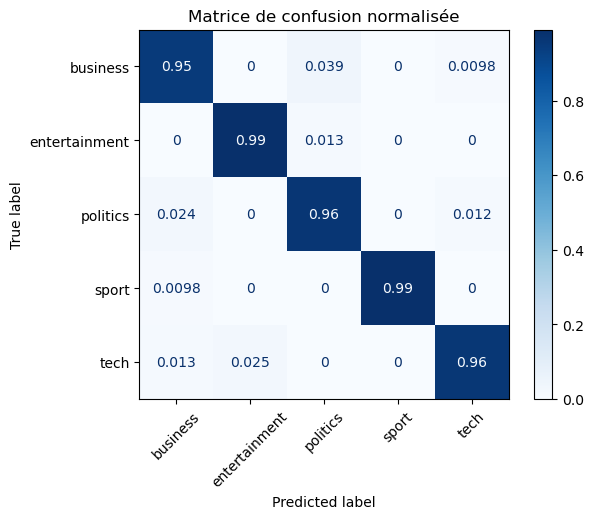

In [67]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
disp = ConfusionMatrixDisplay.from_estimator(
    model, 
    X_test, 
    y_test,
    display_labels=model.classes_,
    cmap=plt.cm.Blues,
    normalize='true'  # Normalise par ligne pour voir les recall par classe
)
plt.xticks(rotation=45)
plt.title("Matrice de confusion normalisée")
plt.show()

In [87]:
print(classification_report(
    y_test, 
    y_test_pred_labels,
    target_names=model.classes_  # Affiche les noms des classes
))

               precision    recall  f1-score   support

     business       0.96      0.95      0.96       102
entertainment       0.97      0.99      0.98        77
     politics       0.94      0.96      0.95        84
        sport       1.00      0.99      1.00       102
         tech       0.97      0.96      0.97        80

     accuracy                           0.97       445
    macro avg       0.97      0.97      0.97       445
 weighted avg       0.97      0.97      0.97       445

